In [1]:
import featuretools as ft
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,RFE, SelectFromModel

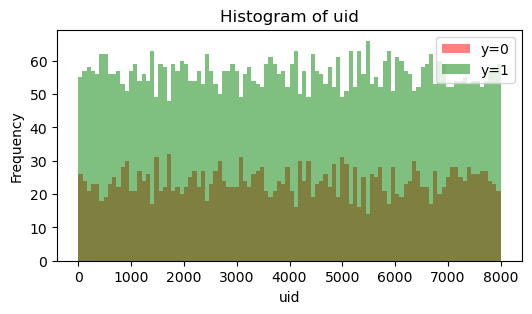

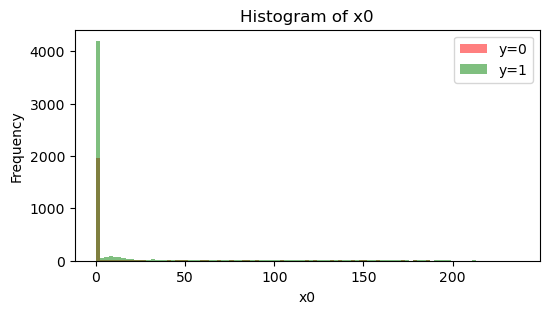

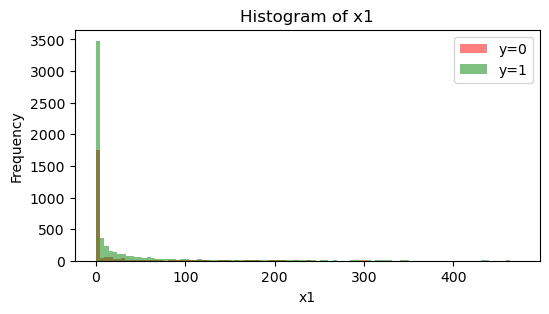

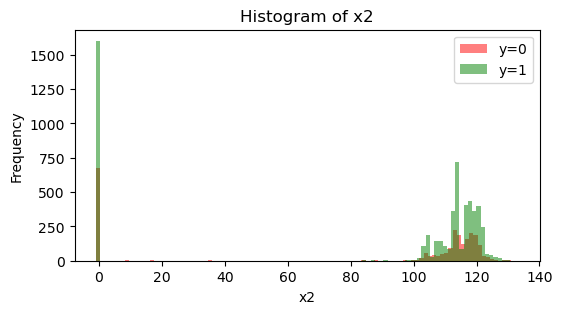

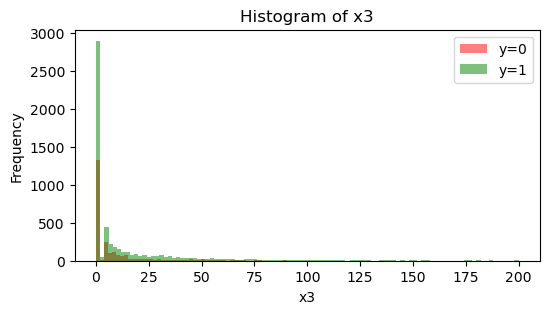

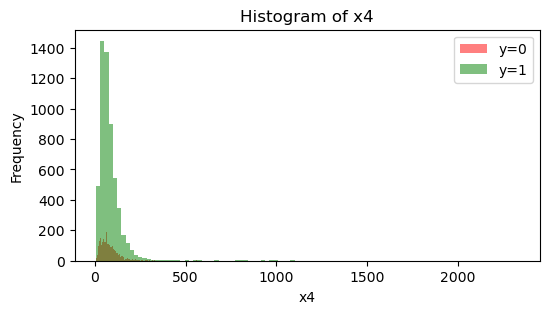

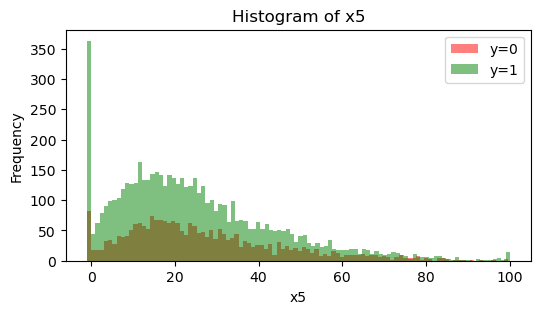

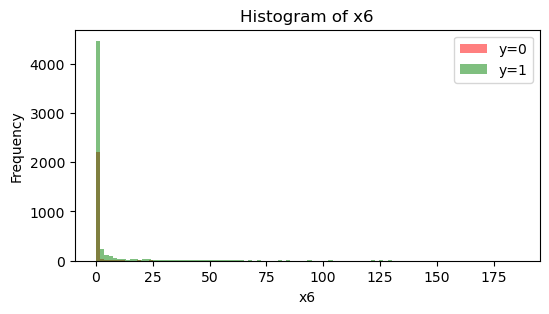

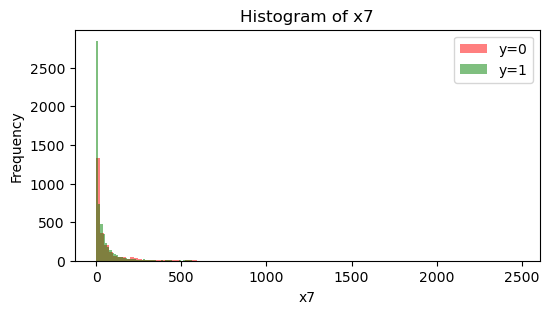

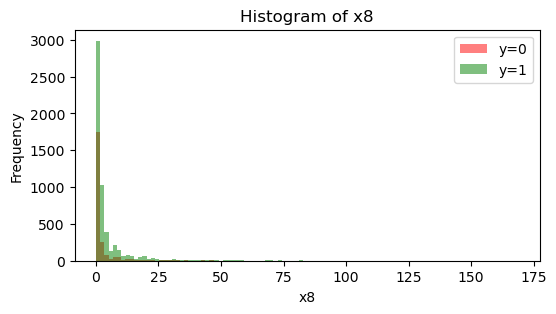

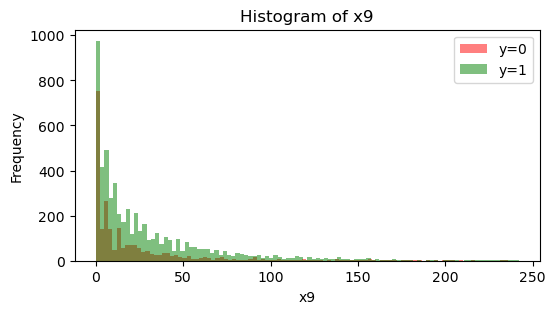

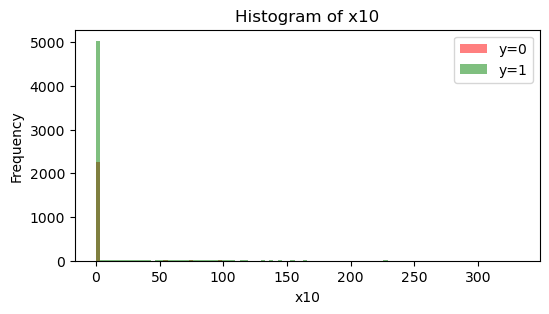

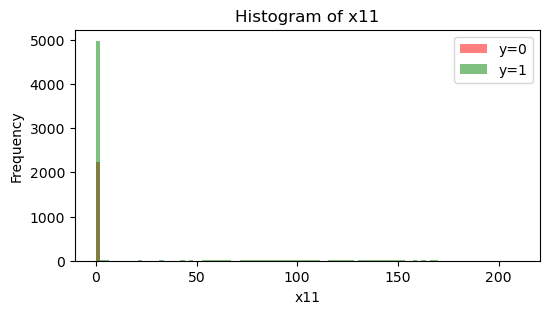

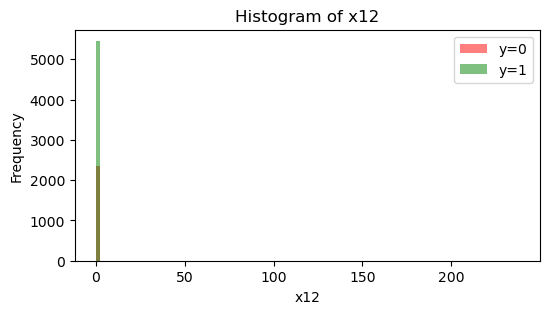

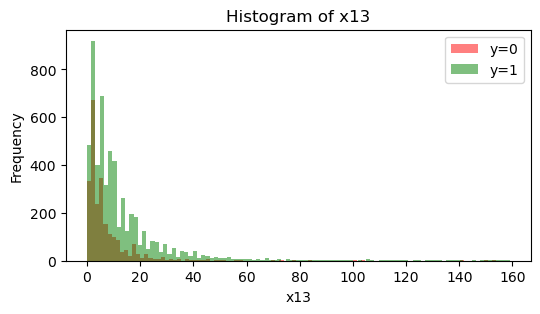

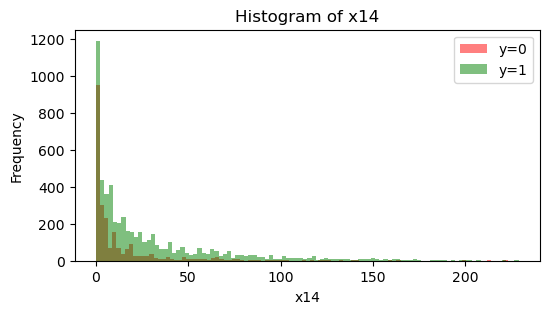

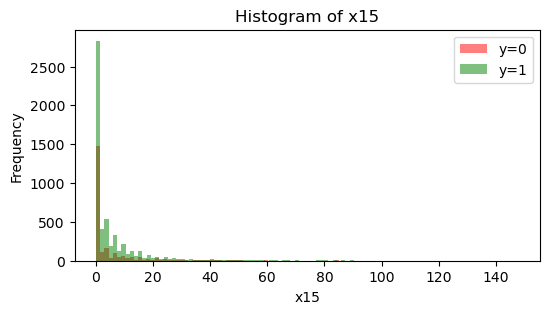

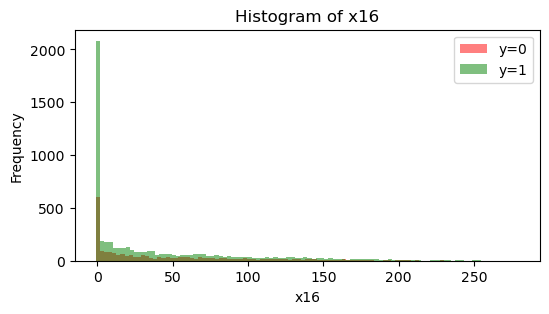

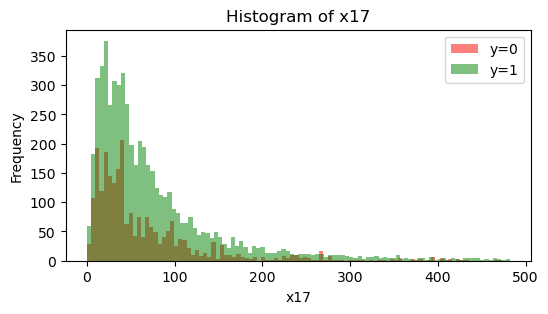

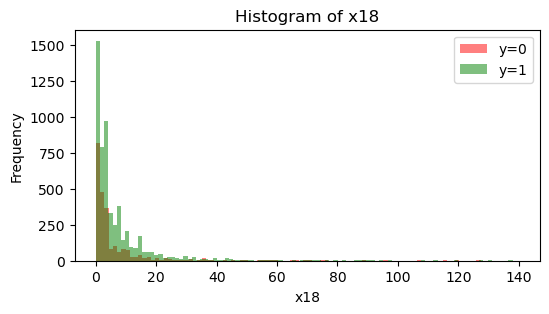

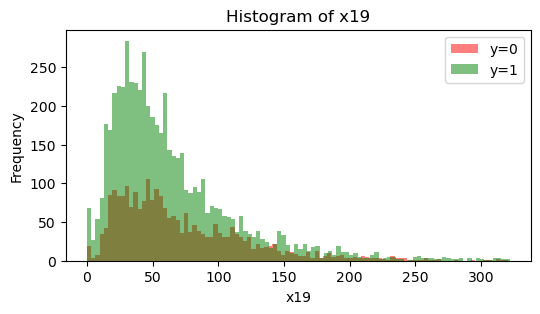

In [8]:
# df = pd.read_csv("train.csv")
# # 分离特征和标签
# X = df.drop(['uid','y'], axis=1)  # 假设目标列名为target
# y = df['y']

# # 循环遍历每个特征列，分别绘制 y 等于 0 和 y 等于 1 的直方图
# for i, column in enumerate(df.columns[:-1]):
#     fig, ax = plt.subplots(1, 1, figsize=(6, 3))
#     ax.hist(df[df['y']==0][column], alpha=0.5, label='y=0', color='red',bins=100)
#     ax.hist(df[df['y']==1][column], alpha=0.5, label='y=1', color='green',bins=100)
#     ax.set_xlabel(column)
#     ax.set_ylabel('Frequency')
#     ax.set_title(f'Histogram of {column}')
#     ax.legend()
#     plt.show()

In [4]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
data_merge=pd.concat([data,data_test],axis=0)
scaler = StandardScaler()
X_merge=data_merge.drop(['uid','y'], axis=1)#hy7id5s4ygkupnjg0f5rc4ee9ftouin;jim[ik=8jkbjascfguuyev4hckjvghkaejcbbfciysjrfgudyioquwahksjdgvft78f9ueiowjhkuduvgfresuykjmbyyvtictctkcrtdivsdasdsrhgfjghggfdgfdgm7kjdu4ws3aw7bubyxsevxvxvbcbcv
X_merge_std = scaler.fit_transform(X_merge)
X_test_std=X_merge_std[8000:]
data_test_std=pd.DataFrame(X_test_std,columns=X_merge.columns)
# data_std['y']=data['y']
data_test_std['uid']=data_test['uid']
# data_std=data_std.drop(['x1','x2','x15'], axis=1)
data_test_std.to_csv("test_std.csv",index=False)

In [38]:
data=pd.read_csv('./train_std.csv')
X=data.drop(['uid','y'],axis=1)
es = ft.EntitySet(id="data_train")
es=es.add_dataframe(dataframe=X,index='uid',dataframe_name='data',time_index=None)
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name='data',
                                      agg_primitives=[],  # 空列表，因为我们不使用聚合原始函数
                                      trans_primitives=['add_numeric', 'multiply_numeric'],  # 选择适当的转换原始函数
                                      max_depth=2,
                                      verbose=True,
                                     )
feature_matrix['uid']=data['uid']
feature_matrix['y']=data['y']
feature_matrix.to_csv('train_std_dfs.csv', index=False)

/home/u200111126/.conda/envs/myenv/lib/python3.8/site-packages/featuretools/entityset/entityset.py:1910: UserWarning: index uid not found in dataframe, creating new integer column
  warnings.warn(
/home/u200111126/.conda/envs/myenv/lib/python3.8/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Built 400 features
Elapsed: 00:00 | Progress: 100%|██████████


In [41]:
data=pd.read_csv("./train_std_dfs.csv")
# data.head()
X=data.drop(['uid','y'],axis=1)
y=data['y']
skb=SelectKBest(k=40)
skb.fit(X,y)
X_40=skb.transform(X)
data_40=pd.DataFrame(X_40)
data_40['uid']=data['uid']
data_40['y']=data['y']
data_40.to_csv("./train_std_dfs_40.csv",index=False)
# correlation = data.corr()
# print(correlation['y'].sort_values(ascending = False))
# print(correlation['uid']['y'])
# plt.figure()
# sns.heatmap(correlation,square = True)
# plt.show()
